In [2]:
from utilities import input_tools,boostHistHelpers as hh
from wremnants import plot_tools,theory_tools
import lz4.frame,pickle
import hist
import numpy as np
import matplotlib.pyplot as plt
import os

Welcome to JupyROOT 6.28/02


In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
minnlo_wm = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WminusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_wp = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WplusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_z = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "ZmumuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)

In [4]:
scetlib_nlo_full_z = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z_mll/inclusive_Z_MSHT20_nlo_full.pkl", nonsing="")
scetlib_nlo_full_wm = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/W/inclusive_Wm_MSHT20_nlo_full.pkl", nonsing="")
scetlib_nlo_full_wp = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/W/inclusive_Wp_MSHT20_nlo_full.pkl", nonsing="")

In [5]:
dyturbo_nlo_z = input_tools.read_dyturbo_hist(["results_z_vj_nlo.txt"], path="/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/", axes=["qT"])
dyturbo_nlo_wm = input_tools.read_dyturbo_hist(["results_wm-1d-nlo-scetlibmatch.txt"], path="/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/", axes=["qT"])
dyturbo_nlo_wp = input_tools.read_dyturbo_hist(["results_wp_vj_nlo.txt"], path="/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/", axes=["qT"])

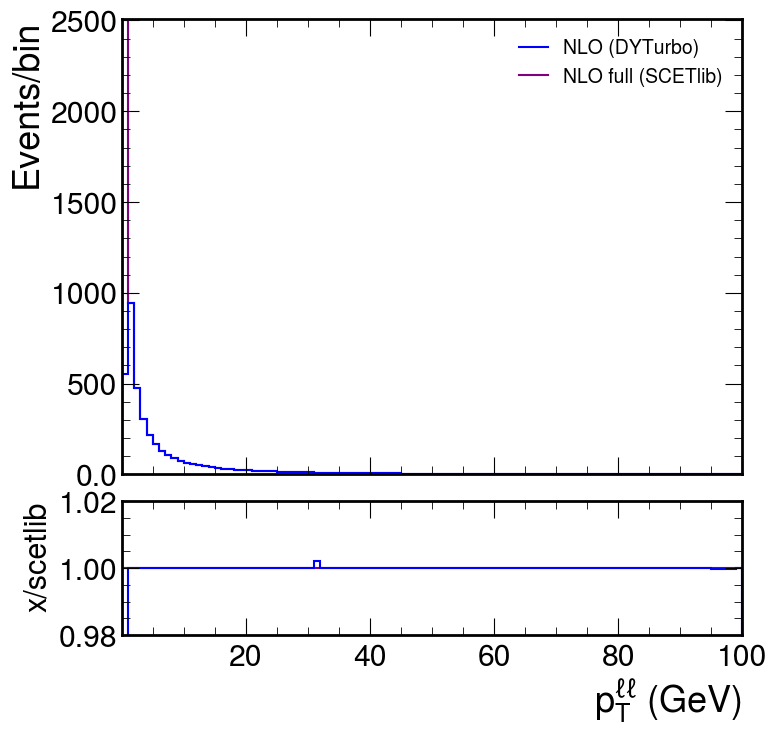

In [6]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [scetlib_nlo_full_z, dyturbo_nlo_z, ]],
            labels=["NLO full (SCETlib)",
                   "NLO (DYTurbo)",
                   ],
            colors=["purple",
                    "blue",
                   ],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            rrange=[0.98, 1.02],
            yscale=0.5,
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

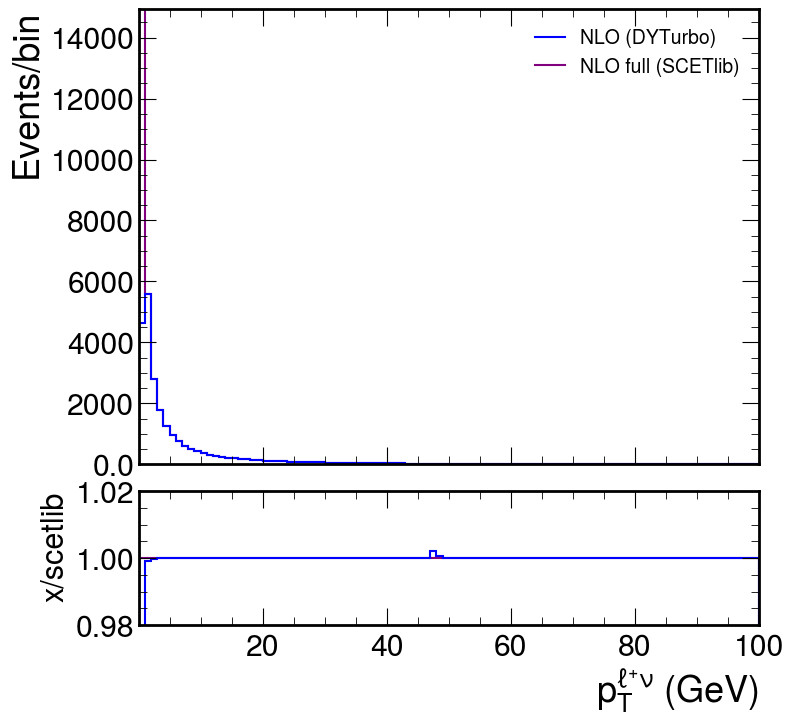

In [7]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [scetlib_nlo_full_wp, dyturbo_nlo_wp, ]],
            labels=["NLO full (SCETlib)",
                   "NLO (DYTurbo)",
                   ],
            colors=["purple",
                    "blue",
                   ],
            xlabel=r"p$_{T}^{\ell^{+}\nu}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            rrange=[0.98, 1.02],
            yscale=0.5,
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

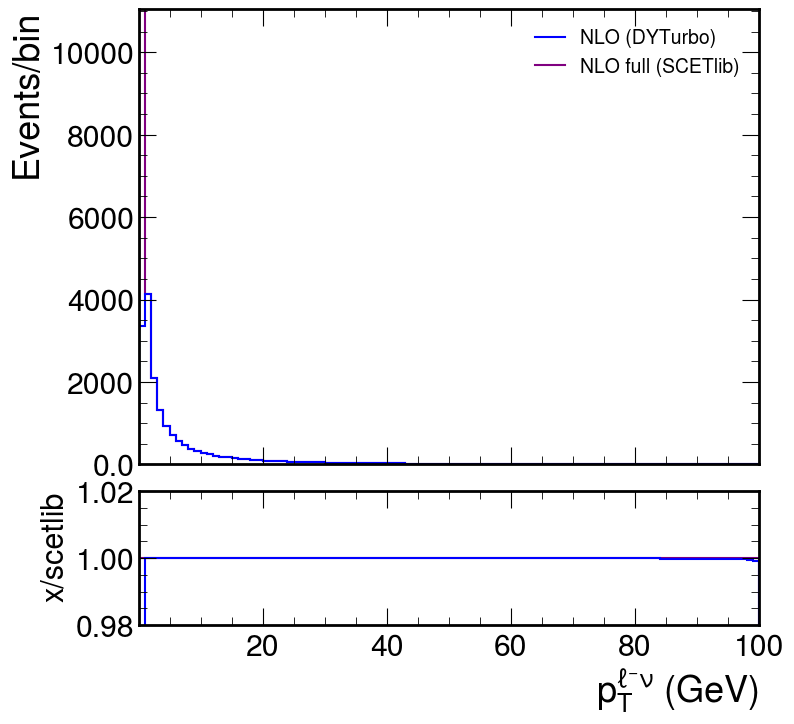

In [8]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [scetlib_nlo_full_wm, dyturbo_nlo_wm, ]],
            labels=["NLO full (SCETlib)",
                   "NLO (DYTurbo)",
                   ],
            colors=["purple",
                    "blue",
                   ],
            xlabel=r"p$_{T}^{\ell^{-}\nu}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            rrange=[0.98, 1.02],
            yscale=0.5,
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [9]:
hn3ll_nnlo_z_2d = input_tools.read_matched_scetlib_dyturbo_hist(
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20.pkl", 
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20_nnlo_sing.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z-2d-vj-nnlo-scetlibmatch.txt",
    axes=["Y", "qT",],
)

In [10]:
dytrubo_z_3d = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Z/results_z-3d-scetlibmatch.txt"], axes=["Q", "Y", "qT"])

In [11]:
dytrubo_z_1d = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z_vj_nnlo.txt"], axes=["qT"])

In [12]:
dytrubo_z_2d = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z-2d-vj-nnlo-scetlibmatch.txt"], axes=["Y", "qT"])

In [13]:
dytrubo_z_3d = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Z/results_z-3d-scetlibmatch.txt"], axes=["Q", "Y", "qT"])

In [14]:
dytrubo_z_2d, dytrubo_z_3d = hh.rebinHistsToCommon([dytrubo_z_2d, dytrubo_z_3d], "Y")

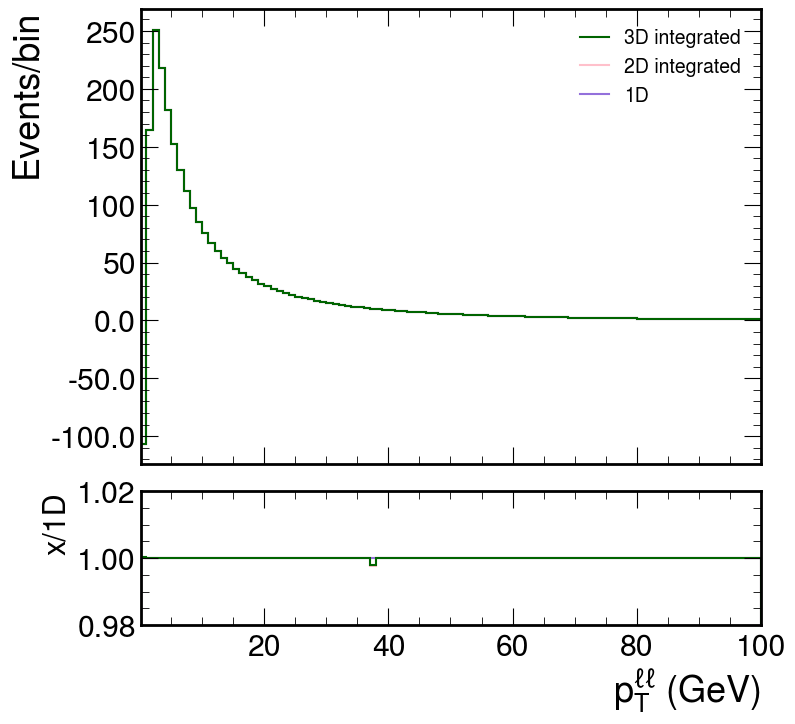

In [15]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [dytrubo_z_1d, dytrubo_z_2d, dytrubo_z_3d]],
            labels=["1D",
                    "2D integrated",
                    "3D integrated",
                   ],
            colors=["mediumpurple",
                    "pink",
                    "darkgreen",
                   ],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/1D",
            rrange=[0.98, 1.02],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

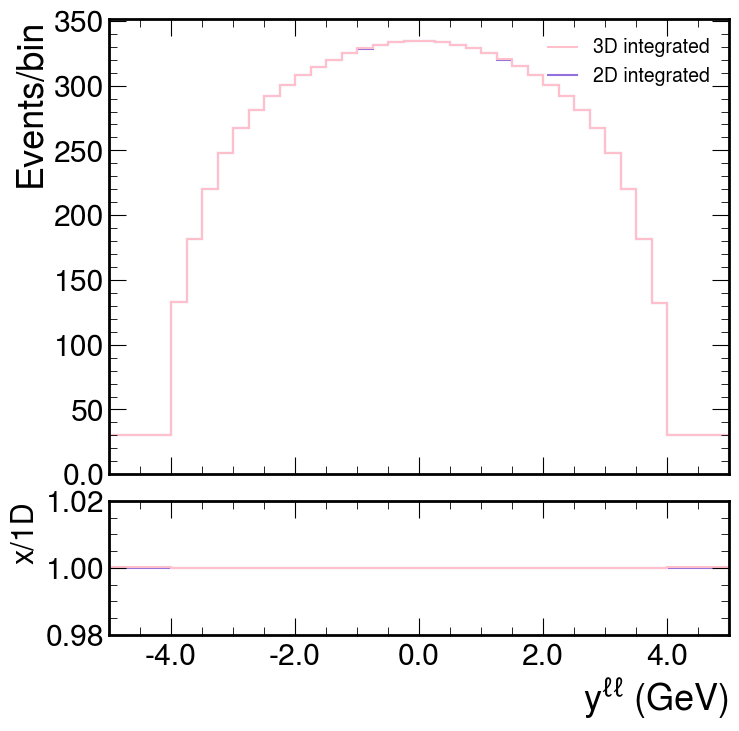

In [16]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("Y") for x in [dytrubo_z_2d, dytrubo_z_3d]],
            labels=[
                    "2D integrated",
                    "3D integrated",
                   ],
            colors=["mediumpurple",
                    "pink",
                   ],
            xlabel=r"y$^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/1D",
            rrange=[0.98, 1.02],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [183]:
hn3ll_nnlo_z = input_tools.read_matched_scetlib_dyturbo_hist(
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20.pkl",
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20_nnlo_sing.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/Z/results_z-3d-scetlibmatch.txt",
    axes=["Q", "Y", "qT",],
)

Resum /home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20.pkl
FO sing /home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20_nnlo_sing.pkl
FO full /scratch/shared/TheoryPredictions/DYTurbo/Z/results_z-3d-scetlibmatch.txt
('Q', 'Y', 'qT', 'vars')
('Q', 'Y', 'qT')
('Q', 'Y', 'qT', 'vars')
(1, 32, 100, 1)
(1, 32, 1, 2)


In [18]:
#hn3ll_z = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20.pkl")
hn3ll_nlo_z = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20.pkl", nonsing="auto")
hn3ll_z = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20.pkl")

In [19]:
dyturbo_n3ll_nnlo_tmp = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Z/results_z-1d-nnlon3llp-g0p8.txt"], axes=["qT"])
dyturbo_n3ll_nnlo = hist.Hist(hist.axis.Regular(100, 0, 100, name="qT"), storage=hist.storage.Weight(), data=dyturbo_n3ll_nnlo_tmp.view(flow=True))


In [20]:
hn3ll_nnlo_z_an3lopdf = input_tools.read_matched_scetlib_dyturbo_hist(
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20an3lo.pkl",
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20an3lo_N3LLp_nnlo_sing.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z-2d-nnlo-vj-scetlibmatch_msht20an3lo.txt",
    axes=[ "Y", "qT",],
)

In [178]:
hn3llp_nnlo_z_an3lopdf = input_tools.read_matched_scetlib_dyturbo_hist(
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20an3lo_N3LLp.pkl",
    "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20an3lo_N3LLp_nnlo_sing.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z-2d-nnlo-vj-scetlibmatch_msht20an3lo.txt",
    axes=[ "Y", "qT",],
)

Resum /home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20an3lo_N3LLp.pkl
FO sing /home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20an3lo_N3LLp_nnlo_sing.pkl
FO full /scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z-2d-nnlo-vj-scetlibmatch_msht20an3lo.txt
('Q', 'Y', 'qT', 'vars')
('Y', 'qT')
('Y', 'qT', 'vars')
(32, 100, 1)
(32, 1, 2)


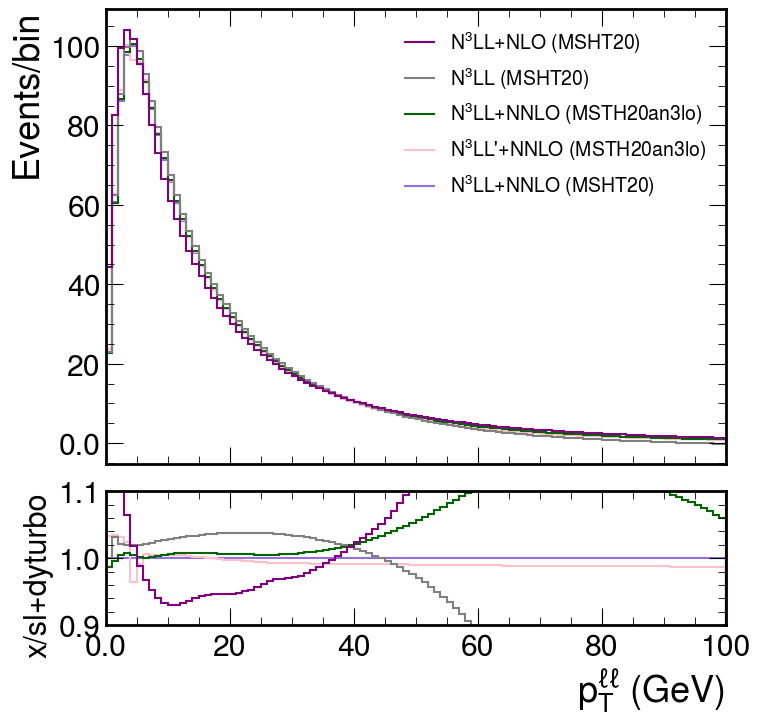

In [22]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x[{"vars" : 0}].project("qT") for x in [hn3ll_nnlo_z, hn3ll_nnlo_z_an3lopdf, hn3llp_nnlo_z_an3lopdf, hn3ll_z, hn3ll_nlo_z, ]],
            labels=["N$^{3}$LL+NNLO (MSHT20)",
                    "N$^{3}$LL'+NNLO (MSTH20an3lo)",
                    "N$^{3}$LL+NNLO (MSTH20an3lo)",
                    "N$^{3}$LL (MSHT20)",
                    "N$^{3}$LL+NLO (MSHT20)",
                   ],
            colors=["mediumpurple",
                    "pink",
                    "darkgreen",
                    "grey",
                    "purple",
                   ],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/sl+dyturbo",
            rrange=[0.9, 1.1],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

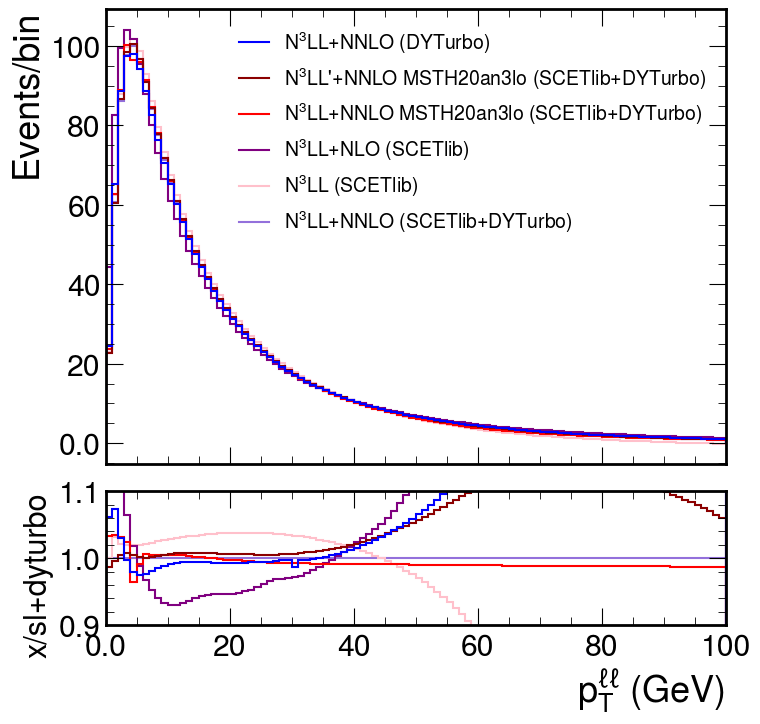

In [25]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x[{"vars" : 0}].project("qT") for x in [hn3ll_nnlo_z, hn3ll_z, hn3ll_nlo_z, hn3ll_nnlo_z_an3lopdf, hn3llp_nnlo_z_an3lopdf]]
                +[dyturbo_n3ll_nnlo],
            labels=["N$^{3}$LL+NNLO (SCETlib+DYTurbo)",
                    "N$^{3}$LL (SCETlib)",
                    "N$^{3}$LL+NLO (SCETlib)",
                    "N$^{3}$LL+NNLO MSTH20an3lo (SCETlib+DYTurbo)",
                    "N$^{3}$LL'+NNLO MSTH20an3lo (SCETlib+DYTurbo)",
                    "N$^{3}$LL+NNLO (DYTurbo)",
                   ],
            colors=["mediumpurple",
                    "pink",
                    "purple",
                    "red",
                    "darkred",
                    "blue",
                   ],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/sl+dyturbo",
            rrange=[0.9, 1.1],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x[{"vars" : 0}].project("qT") for x in [hn3ll_nnlo_z, hn3ll_nlo_z, hn3ll_nnlo_z_an3lopdf, hn3llp_nnlo_z_an3lopdf]]
                +[dyturbo_n3ll_nnlo],
            labels=["N$^{3}$LL+NNLO (SCETlib+DYTurbo)",
                    "N$^{3}$LL+NNLO (DYTurbo)",
                   ],
            colors=["mediumpurple",
                    "pink",
                    "purple",
                    "red",
                    "darkred",
                    "blue",
                   ],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/sl+dyturbo",
            rrange=[0.9, 1.1],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

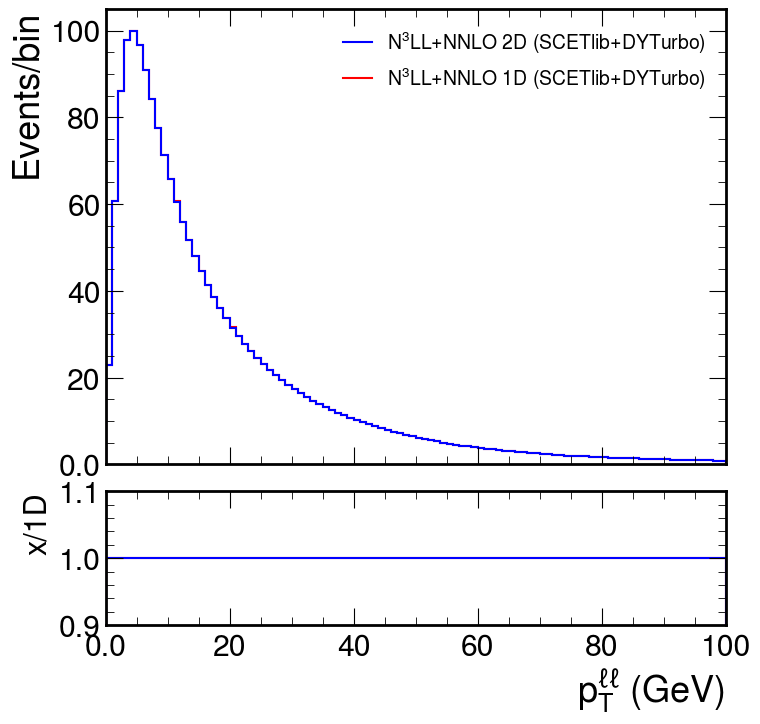

In [26]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x[{"vars" : "central"}].project("qT") for x in [hn3ll_nnlo_z, hn3ll_nnlo_z_2d]],
                #+[dyturbo_n3ll_nnlo[:100.j]],
            labels=["N$^{3}$LL+NNLO 1D (SCETlib+DYTurbo)",
                    "N$^{3}$LL+NNLO 2D (SCETlib+DYTurbo)",
                    #"N$^{3}$LL+NNLO (DYTurbo)",
                   ],
            colors=["red",
                    "blue",
                   ],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/1D",
            rrange=[0.9, 1.1],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [45]:
scetlib_wm_n3ll = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl")

In [163]:
dyturbo_nnlo_wm = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wm-1d-yw-nnlo-pt0to100.txt"], axes=["Y"])

In [166]:
dyturbo_nnlo_wm_full = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wm-1d-yw-nnlo.txt"], axes=["Y"])

In [61]:
hn3ll_nnlo_wm = input_tools.read_matched_scetlib_dyturbo_hist(
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_nnlo_sing.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wm-2d-nnlo-vj-scetlibmatch.txt",
    axes=["Y", "qT",],
)

In [62]:
hn3ll_nnlo_wp = input_tools.read_matched_scetlib_dyturbo_hist(
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wp_MSHT20_tnp_combined.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wp_MSHT20_tnp_nnlo_sing.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wp-2d-nnlo-vj-scetlibmatch.txt",
    axes=["Y", "qT",],
)

In [164]:
minnlo_wm_rebin, scetlib_wm_n3ll_rebin, dyturbo_nnlo_wm_rebin, = hh.rebinHistsToCommon([minnlo_wm, scetlib_wm_n3ll, dyturbo_nnlo_wm, ], ("y", "Y"))

In [175]:
hn3ll_nnlo_wm.shape

(32, 100, 35)

In [176]:
hn3ll_nnlo_wp.shape

(32, 100, 35)

In [165]:
hn3ll_nnlo_wm[{"vars" : "central"}].sum().value/dyturbo_nnlo_wm_rebin.sum().value

0.9849395293578651

In [169]:
sfwm = minnlo_wm_rebin[{"ptVgen" : s[0.j:100.j]}].sum().value/minnlo_wm_rebin.sum().value

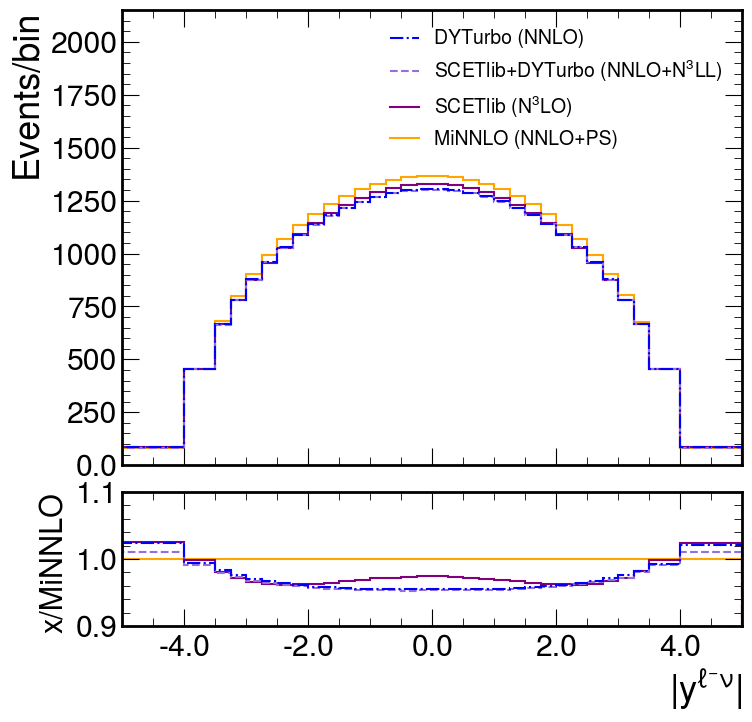

In [173]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                minnlo_wm_rebin[{"ptVgen" : s[0.j:100.j]}].project("y"),
                scetlib_wm_n3ll_rebin[{"qT" : s[0.j:100.j], "vars" : "central"}].project("Y"),
                hn3ll_nnlo_wm[{"qT" : s[0.j:100.j], "vars" : "central"}].project("Y"),
                sfwm*dyturbo_nnlo_wm_rebin,
                
            ],
            labels=["MiNNLO (NNLO+PS)",
                    "SCETlib (N$^{3}$LO)",
                    "SCETlib+DYTurbo (NNLO+N$^{3}$LL)",
                    "DYTurbo (NNLO)",
                   ],
            colors=["orange",
                    "purple",
                    "mediumpurple",
                    "blue",
                   ],
            linestyles=["solid", "solid", "dashed", "dashdot"],
            xlabel=r"$|y^{\ell^{-}\nu}|$", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            rrange=[0.9, 1.1],
            nlegcols=1,
            yscale=1.5,
            xlim=None, binwnorm=1.0, baseline=True, 
    )
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/W"
plot_tools.make_plot_dir(out, "MSHT20")
out = os.path.join(out, "MSHT20")
plot_tools.save_pdf_and_png(out, "y_Wm_MiNNLO_DYTurbo_SCETlib")
plot_tools.write_index_and_log(out, "y_Wm_MiNNLO_DYTurbo_SCETlib")

In [105]:
dyturbo_nnlo_wp_y = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wp-1d-yw-nnlo-all-scetlibmatch-from0p0.txt"], axes=["Y"])

In [137]:
scetlib_wp_n3ll = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wp_MSHT20_tnp_combined.pkl")

In [151]:
minnlo_wp_rebin, n3ll_nnlo_wp_rebin, dyturbo_nnlo_wp_y_rebin, scetlib_wp_n3ll_rebin = hh.rebinHistsToCommon([minnlo_wp[{"massVgen" :hist.sum}], hn3ll_nnlo_wp, dyturbo_nnlo_wp_y, scetlib_wp_n3ll], ("y", "Y"))

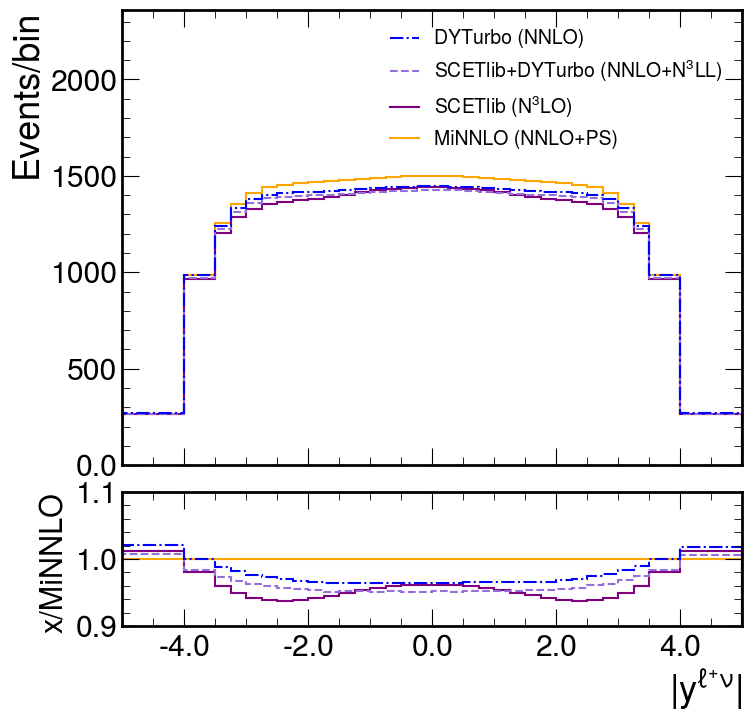

In [144]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                minnlo_wp_rebin[{"ptVgen" : s[0.j:100.j]}].project("y"),
                scetlib_wp_n3ll_rebin[{"qT" : s[0.j:100.j], "vars" : "central"}].project("Y"),
                hn3ll_nnlo_wp[{"qT" : s[0.j:100.j], "vars" : "central"}].project("Y"),
                dyturbo_nnlo_wp_y_rebin,
                
            ],
            labels=["MiNNLO (NNLO+PS)",
                    "SCETlib (N$^{3}$LO)",
                    "SCETlib+DYTurbo (NNLO+N$^{3}$LL)",
                    "DYTurbo (NNLO)",
                   ],
            colors=["orange",
                    "purple",
                    "mediumpurple",
                    "blue",
                   ],
            linestyles=["solid", "solid", "dashed", "dashdot"],
            xlabel=r"$|y^{\ell^{+}\nu}|$", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            rrange=[0.9, 1.1],
            nlegcols=1,
            yscale=1.5,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

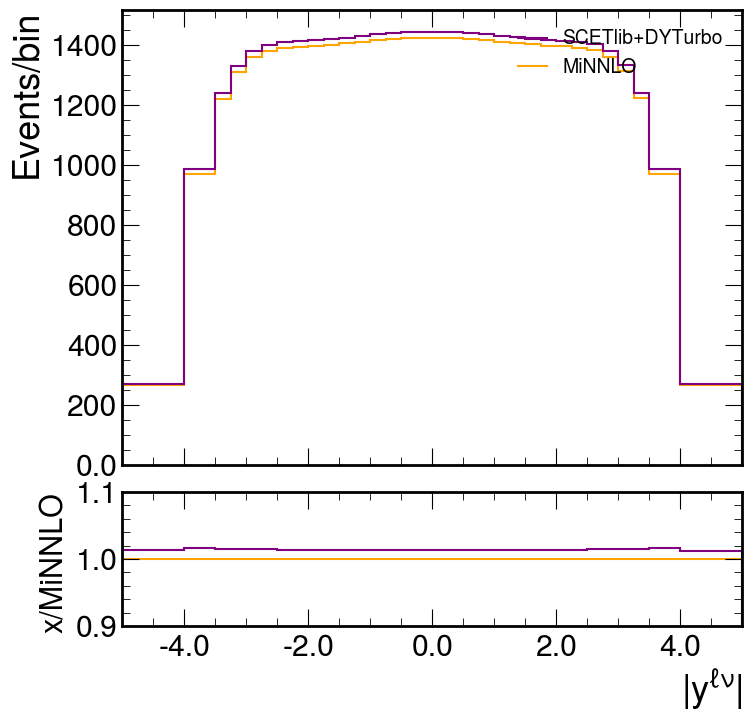

In [157]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                n3ll_nnlo_wp_rebin[{"qT" : s[0.j:100.j], "vars" : "central"}].project("Y"),
                dyturbo_nnlo_wp_y_rebin,
            ],
            labels=["MiNNLO",
                    "SCETlib+DYTurbo",
                   ],
            colors=["orange",
                    "purple",
                   ],
            xlabel=r"$|y^{\ell\nu}|$", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            rrange=[0.9, 1.1],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
s = hist.tag.Slicer()
print(dyturbo_nnlo_wp_rebin[{"qT" : s[0.j:40.j]}].sum())
print(dyturbo_nnlo_wp_rebin.sum())

In [ ]:
scetlib_wm_n3ll_rebin[{"vars" : "central"}]

In [ ]:
hn3ll_nnlo_wm[{"vars" : "central"}]

In [6]:
hn3ll = input_tools.read_scetlib_hist("/home/k/kelong/TheoryCorrections/SCETlib/Z/msht20nnlo/inclusive_Z_MSHT20_NP0_PDFs_combined.pkl")

In [4]:
hscetlib_as = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_PDFvars_combine.pkl")

In [15]:
hscetlib_nnlosing_as = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_PDFalphas_nnlo_sing_combined.pkl")

AttributeError: module 'utilities.input_tools' has no attribute 'read_dyturbo_turbo_pdf_hist'

In [21]:
hdyturbo_nnlo_as = input_tools.read_dyturbo_pdf_hist("/home/k/kelong/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/pdfvariations/MSHT20nnlo_as_smallrange/z0/results_z-2d-nnlo-vj-MSHT20nnlo_as_smallrange-member{i}-scetlibmatch.txt", pdf_members=7, axes=("Y", "qT"))

In [18]:
hn3ll_nnlo_z_pdf = input_tools.read_matched_scetlib_dyturbo_hist(
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_PDFvars_combine.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_nnlo_sing_combined.pkl",
    "/home/k/kelong/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/pdfvariations/msht20nnlo/z0/results_z-2d-nnlo-vj-member0-scetlibmatch.txt.txt",
    axes=["Y", "qT",],
)

ValueError: Did not find any valid files in ['/home/k/kelong/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/pdfvariations/msht20nnlo/z0/results_z-2d-nnlo-vj-member51-scetlibmatch.txt.txt']

In [19]:
hn3ll_nnlo_z_alphas = input_tools.read_matched_scetlib_dyturbo_hist(
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_PDFalphas_combined.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_PDFalphas_nnlo_sing_combined.pkl",
    "/home/k/kelong/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/pdfvariations/MSHT20nnlo_as_smallrange/z0/results_z-2d-nnlo-vj-MSHT20nnlo_as_smallrange-member{i}-scetlibmatch.txt",
    axes=["Y", "qT",],
)

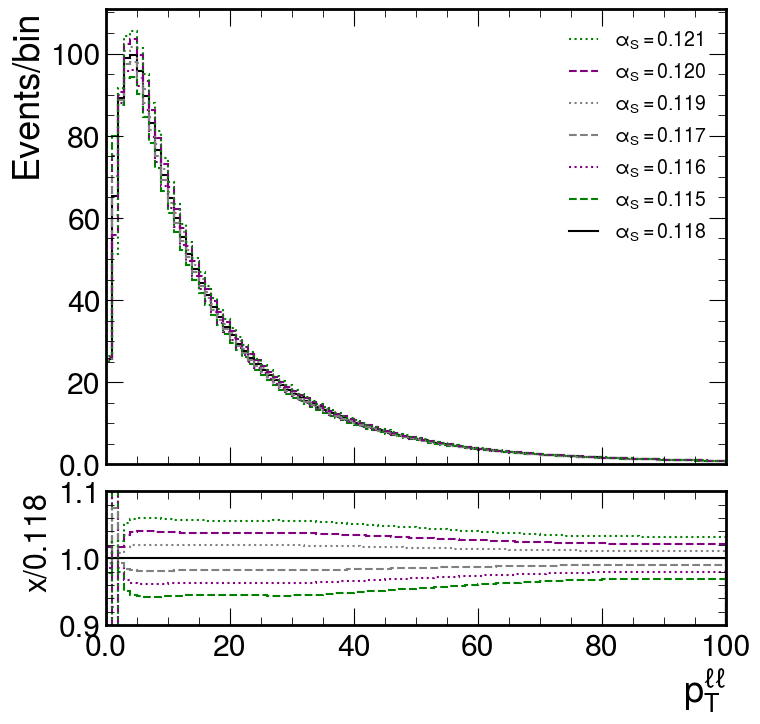

In [6]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                hn3ll_nnlo_z_alphas[{"vars" : "pdf0"}].project("qT"),
                hn3ll_nnlo_z_alphas[{"vars" : "pdf1"}].project("qT"),
                hn3ll_nnlo_z_alphas[{"vars" : "pdf2"}].project("qT"),
                hn3ll_nnlo_z_alphas[{"vars" : "pdf3"}].project("qT"),
                hn3ll_nnlo_z_alphas[{"vars" : "pdf4"}].project("qT"),
                hn3ll_nnlo_z_alphas[{"vars" : "pdf5"}].project("qT"),
                hn3ll_nnlo_z_alphas[{"vars" : "pdf6"}].project("qT"),
            ],
            labels=[r"$\alpha_S = 0.118$",
                    r"$\alpha_S = 0.115$",
                    r"$\alpha_S = 0.116$",
                    r"$\alpha_S = 0.117$",
                    r"$\alpha_S = 0.119$",
                    r"$\alpha_S = 0.120$",
                    r"$\alpha_S = 0.121$",
                   ],
            colors=["black",
                    "green",
                    "purple",
                    "grey",
                    "grey",
                    "purple",
                    "green"
                   ],
            linestyles=[
                "solid", "dashed", "dotted", "dashed", "dotted", "dashed", "dotted"
            ],
            xlabel=r"$p_{T}^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/0.118",
            rrange=[0.9, 1.1],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

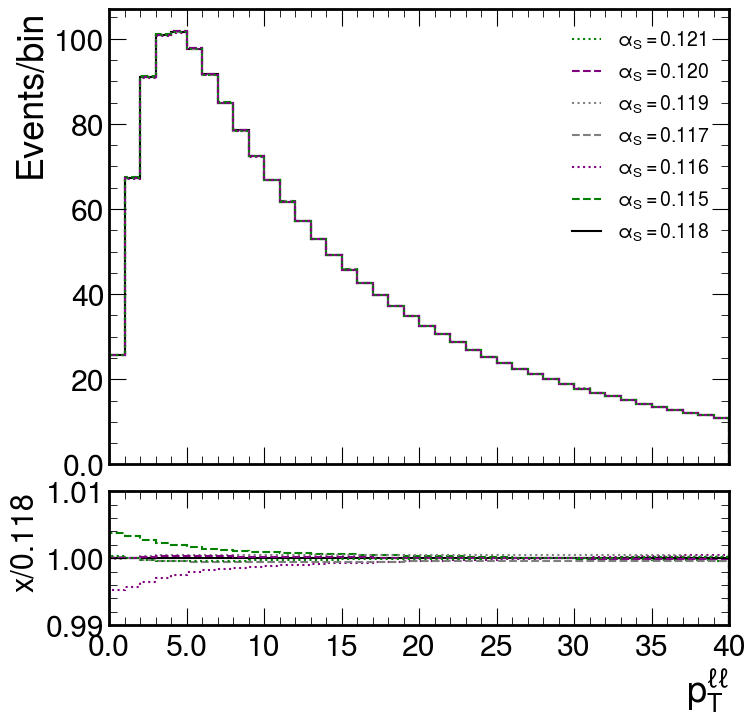

In [26]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                hscetlib_as[{"vars" : "pdf0"}].project("qT")[:40.j],
                hscetlib_as[{"vars" : "pdf1"}].project("qT")[:40.j],
                hscetlib_as[{"vars" : "pdf2"}].project("qT")[:40.j],
                hscetlib_as[{"vars" : "pdf3"}].project("qT")[:40.j],
                hscetlib_as[{"vars" : "pdf4"}].project("qT")[:40.j],
                hscetlib_as[{"vars" : "pdf5"}].project("qT")[:40.j],
                hscetlib_as[{"vars" : "pdf6"}].project("qT")[:40.j],
            ],
            labels=[r"$\alpha_S = 0.118$",
                    r"$\alpha_S = 0.115$",
                    r"$\alpha_S = 0.116$",
                    r"$\alpha_S = 0.117$",
                    r"$\alpha_S = 0.119$",
                    r"$\alpha_S = 0.120$",
                    r"$\alpha_S = 0.121$",
                   ],
            colors=["black",
                    "green",
                    "purple",
                    "grey",
                    "grey",
                    "purple",
                    "green"
                   ],
            linestyles=[
                "solid", "dashed", "dotted", "dashed", "dotted", "dashed", "dotted"
            ],
            xlabel=r"$p_{T}^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/0.118",
            rrange=[0.99, 1.01],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                hdyturbo_nnlo_as[{"vars" : "pdf0"}].project("qT")[:40.j],
                hdyturbo_nnlo_as[{"vars" : "pdf1"}].project("qT")[:40.j],
                hdyturbo_nnlo_as[{"vars" : "pdf2"}].project("qT")[:40.j],
                hdyturbo_nnlo_as[{"vars" : "pdf3"}].project("qT")[:40.j],
                hdyturbo_nnlo_as[{"vars" : "pdf4"}].project("qT")[:40.j],
                hdyturbo_nnlo_as[{"vars" : "pdf5"}].project("qT")[:40.j],
                hdyturbo_nnlo_as[{"vars" : "pdf6"}].project("qT")[:40.j],
            ],
            labels=[r"$\alpha_S = 0.118$",
                    r"$\alpha_S = 0.115$",
                    r"$\alpha_S = 0.116$",
                    r"$\alpha_S = 0.117$",
                    r"$\alpha_S = 0.119$",
                    r"$\alpha_S = 0.120$",
                    r"$\alpha_S = 0.121$",
                   ],
            colors=["black",
                    "green",
                    "purple",
                    "grey",
                    "grey",
                    "purple",
                    "green"
                   ],
            linestyles=[
                "solid", "dashed", "dotted", "dashed", "dotted", "dashed", "dotted"
            ],
            xlabel=r"$p_{T}^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/0.118",
            rrange=[0.9, 1.1],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )